In [29]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\pedro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [30]:
#Importação do Conjunto de Dados


import pandas as pd

df = pd.read_csv('online_retail_09_10.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


In [31]:
print(df.isnull().sum())
df.dropna(inplace=True)

InvoiceNo           0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     107927
Country             0
dtype: int64


In [32]:
#1. Tratar Valores Ausentes e Inconsistências

print(df.dtypes)

df['Quantity'] = df['Quantity'].astype(int)
df['UnitPrice'] = df['UnitPrice'].astype(float)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [33]:
#2. Remover Duplicatas e Outliers

df.drop_duplicates(inplace=True)


Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1


df = df[(df['Quantity'] >= (Q1 - 1.5 * IQR)) & (df['Quantity'] <= (Q3 + 1.5 * IQR))]


Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['UnitPrice'] >= (Q1 - 1.5 * IQR)) & (df['UnitPrice'] <= (Q3 + 1.5 * IQR))]

df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,12/1/2009 7:45,1.65,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


In [34]:
#2. Análise Exploratória de Dados (EDA)
#Estatísticas Descritivas


df.describe()


mean_quantity = df['Quantity'].mean()
median_quantity = df['Quantity'].median()
mode_quantity = df['Quantity'].mode()[0]
std_quantity = df['Quantity'].std()

print(f"Média: {mean_quantity}, Mediana: {median_quantity}, Moda: {mode_quantity}, Desvio Padrão: {std_quantity}")




Média: 7.0066986605544015, Mediana: 5.0, Moda: 1, Desvio Padrão: 6.742736979777914


In [35]:
#Identificação de Produtos, Clientes e Períodos Chave

#Produtos Mais Vendidos

top_products = df['Description'].value_counts().head(10)
print(top_products)






Description
WHITE HANGING HEART T-LIGHT HOLDER    2540
STRAWBERRY CERAMIC TRINKET BOX        1327
HOME BUILDING BLOCK WORD              1199
REX CASH+CARRY JUMBO SHOPPER          1104
ASSORTED COLOUR BIRD ORNAMENT         1076
BAKING SET 9 PIECE RETROSPOT          1061
60 TEATIME FAIRY CAKE CASES           1014
WOODEN FRAME ANTIQUE WHITE            1012
HEART OF WICKER LARGE                  989
LUNCH BAG RED SPOTTY                   984
Name: count, dtype: int64


In [36]:
#Clientes Mais Valiosos


df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(5)
print(top_customers)


CustomerID
14911.0    91609.84
17850.0    47246.65
14156.0    33793.49
13089.0    31378.90
15311.0    22909.84
Name: TotalPrice, dtype: float64


In [37]:
#Períodos de Maior Volume de Vendas

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
sales_per_month = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()
print(sales_per_month)


InvoiceDate
2009-12-31    358273.030
2010-01-31    251096.752
2010-02-28    260971.146
2010-03-31    351548.111
2010-04-30    306165.462
2010-05-31    298925.030
2010-06-30    314283.710
2010-07-31    292996.140
2010-08-31    293123.450
2010-09-30    401561.411
2010-10-31    535859.210
2010-11-30    604353.022
2010-12-31    149251.810
Freq: ME, Name: TotalPrice, dtype: float64


C:\Users\pedro\AppData\Local\Temp\ipykernel_18376\2709473661.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_per_month = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()


In [ ]:
# 3. Visualizações em Python

import matplotlib.pyplot as plt
import seaborn as sns

# Configuração opcional de estilo
sns.set_style('whitegrid')




awda


In [39]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\pedro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [40]:
%pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\pedro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


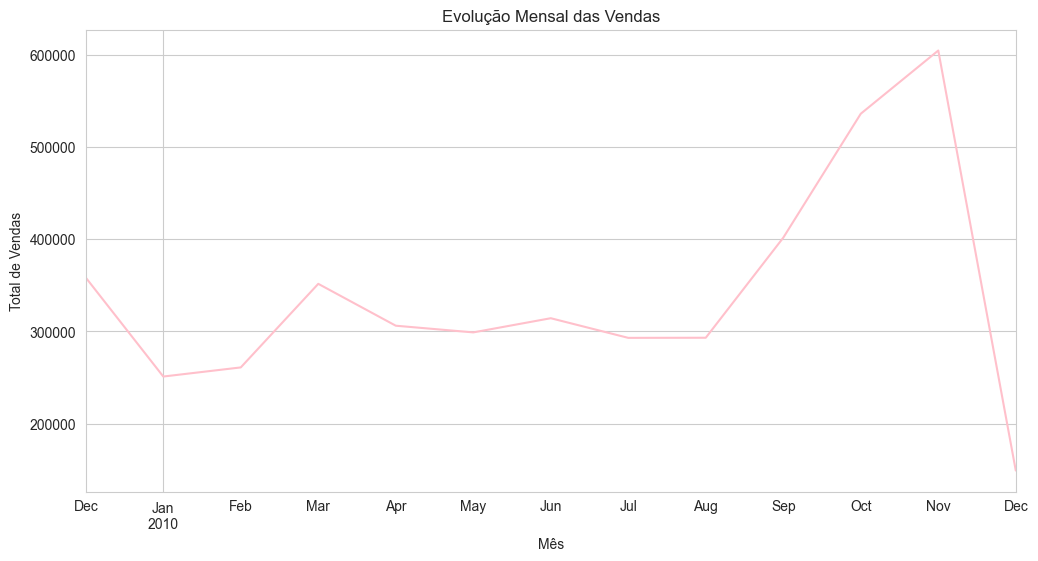

In [41]:
#Evolução das Vendas ao Longo do Tempo


plt.figure(figsize=(12,6))
sales_per_month.plot(color='pink')
plt.title('Evolução Mensal das Vendas')
plt.xlabel('Mês')
plt.savefig('docs/sales_over_time.png')
plt.ylabel('Total de Vendas')
sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
plt.show()


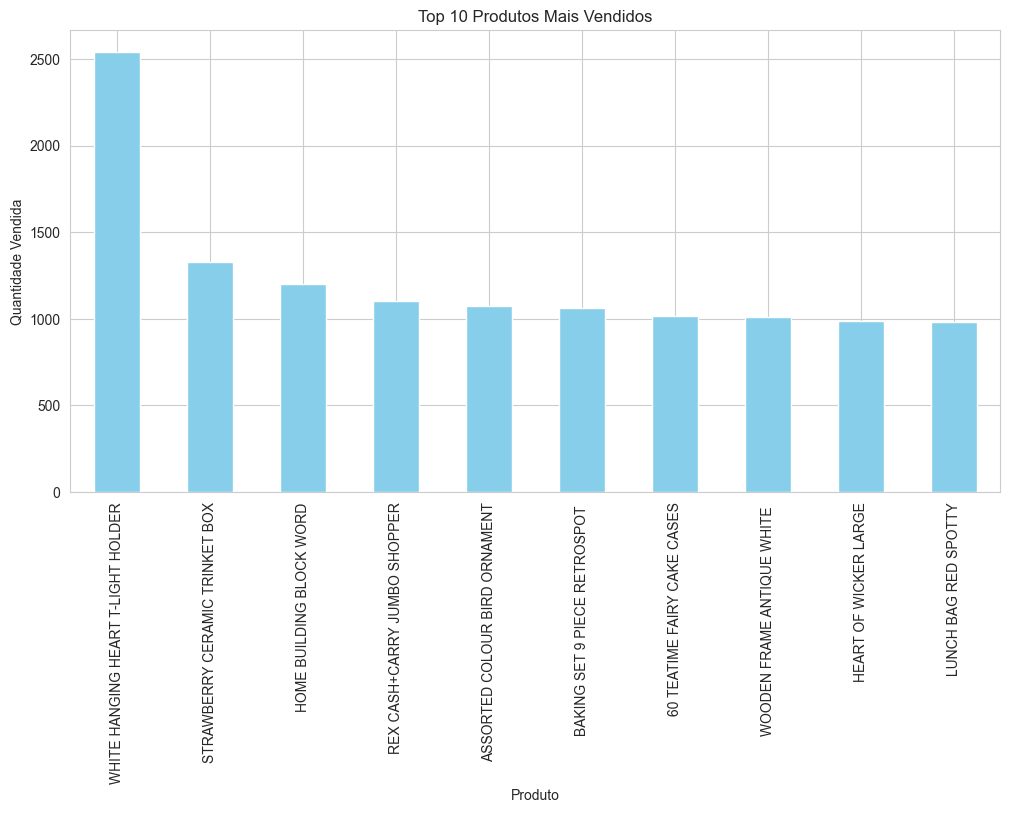

In [42]:
#Principais Produtos e Categorias

plt.figure(figsize=(12,6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.savefig('docs/top_products.png')
plt.show()


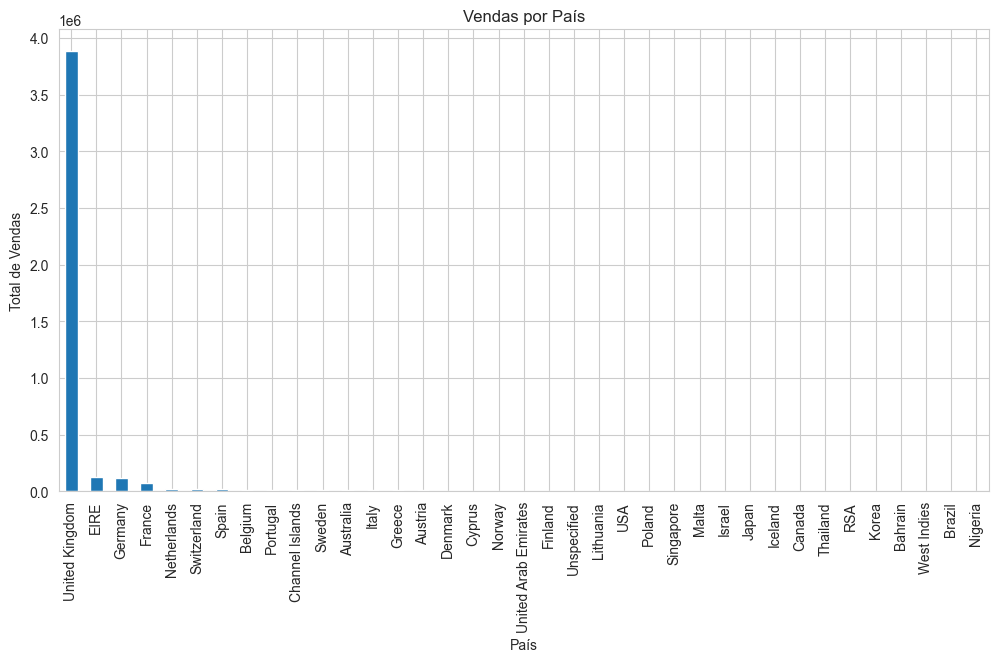

In [43]:
#Distribuição Geográfica das Vendas

country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
country_sales.plot(kind='bar')
plt.title('Vendas por País')
plt.xlabel('País')
plt.ylabel('Total de Vendas')
plt.savefig('docs/sales_by_country.png')
plt.show()


In [44]:
# Gerar Relatórios em Formato CSV

top_customers.to_csv('data/top_customers.csv', index=True)

top_products.to_csv('data/top_products.csv', index=True)


In [45]:
%pip install json

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\pedro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [46]:
import json

with open('config.json', 'r') as config_file:
    config = json.load(config_file)

data_file = config['data_file']
output_dir = config['output_dir']
date_format = config['date_format']


In [47]:
%pip install oracledb

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\pedro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import json
import oracledb

class DB:
    def __init__(self):
        self.connection, self.cursor = self.connect_to_db()

    def __del__(self):
        self.cursor.close()
        self.connection.close()

    @staticmethod
    def connect_to_db():
        dsn_str = oracledb.makedsn("oracle.fiap.com.br", 1521, service_name="orcl")
        with open("credenciais.json") as f:
            credentials = json.load(f)
            user = credentials["user"]
            password = credentials["password"]
        connection = oracledb.connect(user=user, password=password, dsn=dsn_str)
        cursor = connection.cursor()
        return connection, cursor

    def create_tables(self):
        """Cria as tabelas Clientes, Pedidos e Vendas, se ainda não existirem."""
        try:
            # Exclui a tabela Clientes se ela já existir
            self.cursor.execute('''
            BEGIN
                EXECUTE IMMEDIATE 'DROP TABLE Clientes CASCADE CONSTRAINTS';
            EXCEPTION
                WHEN OTHERS THEN
                    IF SQLCODE != -942 THEN
                        RAISE;
                    END IF;
            END;
            ''')

            # Criação da tabela Clientes
            self.cursor.execute('''
            CREATE TABLE Clientes (
                ClienteID NUMBER PRIMARY KEY,
                Nome VARCHAR2(100),
                Pais VARCHAR2(50),
                TotalGasto NUMBER DEFAULT 0
            )
            ''')

            # Exclui a tabela Pedidos se ela já existir
            self.cursor.execute('''
            BEGIN
                EXECUTE IMMEDIATE 'DROP TABLE Pedidos CASCADE CONSTRAINTS';
            EXCEPTION
                WHEN OTHERS THEN
                    IF SQLCODE != -942 THEN
                        RAISE;
                    END IF;
            END;
            ''')

            # Criação da tabela Pedidos
            self.cursor.execute('''
            CREATE TABLE Pedidos (
                PedidoID NUMBER PRIMARY KEY,
                ClienteID NUMBER,
                ValorPedido NUMBER,
                DataPedido DATE,
                FOREIGN KEY (ClienteID) REFERENCES Clientes(ClienteID)
            )
            ''')

            # Exclui a tabela Vendas se ela já existir
            self.cursor.execute('''
            BEGIN
                EXECUTE IMMEDIATE 'DROP TABLE Vendas CASCADE CONSTRAINTS';
            EXCEPTION
                WHEN OTHERS THEN
                    IF SQLCODE != -942 THEN
                        RAISE;
                    END IF;
            END;
            ''')

            # Criação da tabela Vendas
            self.cursor.execute('''
            CREATE TABLE Vendas (
                VendaID NUMBER PRIMARY KEY,
                ProdutoID NUMBER,
                QuantidadeVendida NUMBER,
                DataVenda DATE
            )
            ''')

            self.connection.commit()
            print("Tabelas 'Clientes', 'Pedidos' e 'Vendas' criadas com sucesso.")

        except Exception as e:
            print("Erro ao criar tabelas:", e)
            self.connection.rollback()

    def create_trigger(self):
        """Cria uma trigger para atualizar o TotalGasto na tabela Clientes."""
        try:
            trigger_query = '''
            CREATE OR REPLACE TRIGGER Atualiza_TotalGasto
            AFTER INSERT ON Pedidos
            FOR EACH ROW
            BEGIN
                UPDATE Clientes
                SET TotalGasto = TotalGasto + :NEW.ValorPedido
                WHERE ClienteID = :NEW.ClienteID;
            END;
            '''
            self.cursor.execute(trigger_query)
            self.connection.commit()
            print("Trigger 'Atualiza_TotalGasto' criada com sucesso.")
            return "Trigger criada com sucesso."

        except Exception as e:
            print("Erro ao criar trigger:", e)
            self.connection.rollback()
            return f"Erro ao criar trigger: {e}"

    def insert_cliente(self, cliente_id, nome, pais):
        """Insere um cliente na tabela Clientes, se o ID não existir."""
        try:
            # Verifica se o cliente já existe
            self.cursor.execute("SELECT COUNT(*) FROM Clientes WHERE ClienteID = :1", (cliente_id,))
            if self.cursor.fetchone()[0] > 0:
                print(f"Cliente com ID {cliente_id} já existe.")
                return f"Cliente com ID {cliente_id} já existe."

            self.cursor.execute('''
            INSERT INTO Clientes (ClienteID, Nome, Pais)
            VALUES (:1, :2, :3)
            ''', (cliente_id, nome, pais))
            self.connection.commit()
            print(f"Cliente {nome} inserido com sucesso.")
        except Exception as e:
            print("Erro ao inserir cliente:", e)
            self.connection.rollback()

    def insert_pedido(self, pedido_id, cliente_id, valor_pedido, data_pedido):
        """Insere um pedido na tabela Pedidos e ativa a trigger, se o ID não existir."""
        try:
            # Verifica se o pedido já existe
            self.cursor.execute("SELECT COUNT(*) FROM Pedidos WHERE PedidoID = :1", (pedido_id,))
            if self.cursor.fetchone()[0] > 0:
                print(f"Pedido com ID {pedido_id} já existe.")
                return f"Pedido com ID {pedido_id} já existe."

            self.cursor.execute('''
            INSERT INTO Pedidos (PedidoID, ClienteID, ValorPedido, DataPedido)
            VALUES (:1, :2, :3, TO_DATE(:4, 'YYYY-MM-DD'))
            ''', (pedido_id, cliente_id, valor_pedido, data_pedido))
            self.connection.commit()
            print(f"Pedido {pedido_id} inserido com sucesso para o cliente {cliente_id}.")
        except Exception as e:
            print("Erro ao inserir pedido:", e)
            self.connection.rollback()

    def insert_venda(self, venda_id, produto_id, quantidade_vendida, data_venda):
        """Insere uma venda na tabela Vendas, se o ID não existir."""
        try:
            # Verifica se a venda já existe
            self.cursor.execute("SELECT COUNT(*) FROM Vendas WHERE VendaID = :1", (venda_id,))
            if self.cursor.fetchone()[0] > 0:
                print(f"Venda com ID {venda_id} já existe.")
                return f"Venda com ID {venda_id} já existe."

            self.cursor.execute('''
            INSERT INTO Vendas (VendaID, ProdutoID, QuantidadeVendida, DataVenda)
            VALUES (:1, :2, :3, TO_DATE(:4, 'YYYY-MM-DD'))
            ''', (venda_id, produto_id, quantidade_vendida, data_venda))
            self.connection.commit()
            print(f"Venda {venda_id} inserida com sucesso para o produto {produto_id}.")
        except Exception as e:
            print("Erro ao inserir venda:", e)
            self.connection.rollback()
    def top_product_last_quarter(self):
        """Retorna o produto com maior aumento de vendas no último trimestre."""
        try:
            query = '''
            SELECT ProdutoID, SUM(QuantidadeVendida) AS TotalVendas
            FROM Vendas
            WHERE DataVenda >= ADD_MONTHS(TRUNC(SYSDATE, 'Q'), -3)
            GROUP BY ProdutoID
            ORDER BY TotalVendas DESC
            FETCH FIRST 1 ROW ONLY
            '''
            self.cursor.execute(query)
            result = self.cursor.fetchall()
            print("Produto com Maior Aumento de Vendas no Último Trimestre:")
            for row in result:
                print(f"ProdutoID: {row[0]}, Total Vendas: {row[1]}")
            return result
        except Exception as e:
            print("Erro na consulta de produto com maior aumento de vendas:", e)
            return None
    def top_region_for_expansion(self):
        """Retorna a região com maior potencial para expansão."""
        try:
            query = '''
            SELECT Pais, SUM(TotalGasto) AS PotencialExpansao
            FROM Clientes
            GROUP BY Pais
            ORDER BY PotencialExpansao DESC
            FETCH FIRST 1 ROW ONLY
            '''
            self.cursor.execute(query)
            result = self.cursor.fetchall()
            print("Região com Maior Potencial para Expansão:")
            for row in result:
                print(f"País: {row[0]}, Potencial de Expansão: {row[1]}")
            return result
        except Exception as e:
            print("Erro na consulta de região com maior potencial de expansão:", e)
            return None
    def create_procedure_update_stock(self):
        """Cria o procedimento que atualiza o estoque com base nas vendas realizadas."""
        procedure_query = '''
        CREATE OR REPLACE PROCEDURE Atualiza_Estoque(produto_id NUMBER, quantidade_vendida NUMBER) IS
        BEGIN
            UPDATE Estoque
            SET Quantidade = Quantidade - quantidade_vendida
            WHERE ProdutoID = produto_id;
            COMMIT;
        END;
        '''
        self.cursor.execute(procedure_query)
        self.connection.commit()
        print("Procedimento 'Atualiza_Estoque' criado com sucesso.")

    def create_procedure_generate_report(self):
        """Cria o procedimento que gera relatórios mensais de vendas."""
        procedure_query = '''
        CREATE OR REPLACE PROCEDURE Gera_Relatorio_Mensal(ano NUMBER, mes NUMBER) IS
            CURSOR c_vendas IS
                SELECT ProdutoID, SUM(QuantidadeVendida) AS TotalVendas
                FROM Vendas
                WHERE EXTRACT(YEAR FROM DataVenda) = ano
                  AND EXTRACT(MONTH FROM DataVenda) = mes
                GROUP BY ProdutoID;
        BEGIN
            FOR venda IN c_vendas LOOP
                DBMS_OUTPUT.PUT_LINE('ProdutoID: ' || venda.ProdutoID || ', Total Vendido: ' || venda.TotalVendas);
            END LOOP;
        END;
        '''
        self.cursor.execute(procedure_query)
        self.connection.commit()
        print("Procedimento 'Gera_Relatorio_Mensal' criado com sucesso.")

    def create_function_avg_time_between_purchases(self):
        """Cria a função que calcula o tempo médio entre compras de um cliente."""
        function_query = '''
        CREATE OR REPLACE FUNCTION Tempo_Medio_Entre_Compras(cliente_id NUMBER) RETURN NUMBER IS
            tempo_medio NUMBER;
        BEGIN
            SELECT AVG(DATE_PART('day', LEAD(DataPedido) OVER (ORDER BY DataPedido) - DataPedido))
            INTO tempo_medio
            FROM Pedidos
            WHERE ClienteID = cliente_id;
            RETURN NVL(tempo_medio, 0);
        END;
        '''
        self.cursor.execute(function_query)
        self.connection.commit()
        print("Função 'Tempo_Medio_Entre_Compras' criada com sucesso.")

    def create_trigger_audit_clientes(self):
        """Cria o trigger que registra alterações na tabela Clientes."""
        trigger_query = '''
        CREATE OR REPLACE TRIGGER Audita_Clientes
        AFTER UPDATE ON Clientes
        FOR EACH ROW
        BEGIN
            INSERT INTO Clientes_Auditoria (ClienteID, Operacao, DataOperacao, Usuario)
            VALUES (:OLD.ClienteID, 'UPDATE', SYSDATE, USER);
        END;
        '''
        self.cursor.execute(trigger_query)
        self.connection.commit()
        print("Trigger 'Audita_Clientes' criada com sucesso.")
    def top_5_customers_by_revenue(self):
        """Retorna os 5 clientes com maior faturamento total."""
        try:
            query = '''
            SELECT Nome, TotalGasto
            FROM Clientes
            ORDER BY TotalGasto DESC
            FETCH FIRST 5 ROWS ONLY
            '''
            self.cursor.execute(query)
            result = self.cursor.fetchall()
            print("Top 5 Clientes com Maior Faturamento Total:")
            for row in result:
                print(f"Nome: {row[0]}, Total Gasto: {row[1]}")
            return result
        except Exception as e:
            print("Erro na consulta de top clientes:", e)
            return None

    def check_total_gasto(self, cliente_id):
        """Verifica o total gasto de um cliente específico."""
        try:
            self.cursor.execute('''
            SELECT TotalGasto FROM Clientes WHERE ClienteID = :1
            ''', (cliente_id,))
            total_gasto = self.cursor.fetchone()[0]
            print(f"Total gasto pelo cliente {cliente_id}: {total_gasto}")
            return total_gasto
        except Exception as e:
            print("Erro ao verificar o total gasto:", e)
            return None


In [21]:
# Instancia a classe DB e cria as tabelas
db = DB()
db.create_tables()       # Cria as tabelas, caso ainda não existam
db.create_trigger()      # Cria a trigger

# Insere um cliente
db.insert_cliente(1, "João", "Brasil")

# Insere um pedido e verifica se o TotalGasto do cliente foi atualizado
db.insert_pedido(1, 1, 500, "2023-11-05")  # Insere um pedido de R$500 para o cliente com ID 1


Tabelas 'Clientes', 'Pedidos' e 'Vendas' criadas com sucesso.
Trigger 'Atualiza_TotalGasto' criada com sucesso.
Cliente João inserido com sucesso.
Pedido 1 inserido com sucesso para o cliente 1.


In [3]:
db = DB()
db.top_5_customers_by_revenue()
db.top_product_last_quarter()
db.top_region_for_expansion()

Top 5 Clientes com Maior Faturamento Total:
Nome: João, Total Gasto: 500
Produto com Maior Aumento de Vendas no Último Trimestre:
Região com Maior Potencial para Expansão:
País: Brasil, Potencial de Expansão: 500


[('Brasil', 500)]

In [6]:
db = DB()

# Criar procedimentos
db.create_procedure_update_stock()
db.create_procedure_generate_report()

# Criar função
db.create_function_avg_time_between_purchases()

# Criar trigger
db.create_trigger_audit_clientes()


Procedimento 'Atualiza_Estoque' criado com sucesso.
Procedimento 'Gera_Relatorio_Mensal' criado com sucesso.
Função 'Tempo_Medio_Entre_Compras' criada com sucesso.
Trigger 'Audita_Clientes' criada com sucesso.
